In [40]:
import os 
# library 
from PIL import Image 
import matplotlib.pyplot as plt 
from skimage.feature import graycomatrix,graycoprops
from skimage import io
import cv2

In [2]:
import numpy as np

In [3]:
import pandas as pd 

In [8]:
os.getcwd()
os.chdir('../')

In [10]:
os.listdir()

['.ipynb_checkpoints',
 '0-1-2-3.jpg',
 'app.py',
 'Brodatz Texture',
 'requirements.txt',
 'research']

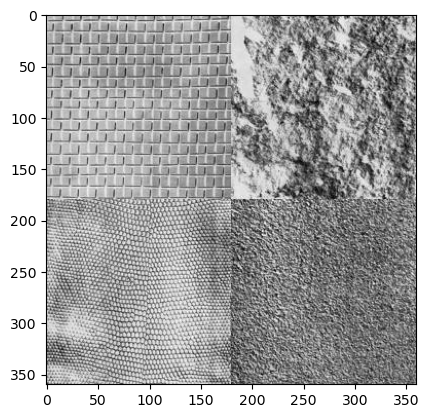

In [46]:
image = io.imread('0-1-2-3.jpg')
gray= cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [47]:
print(gray.shape)

(360, 360)


In [56]:
def create_patches(gray):
    PATCH_SIZE=21
    PATCH_CENTRE=[]
    for i in range(1,330):  
        for j in range(1,330):
            PATCH_CENTRE.append(((PATCH_SIZE//2+1)+(i-1),(PATCH_SIZE//2+1)+(j-1)))                

    x1=[]
    x2=[]
    y1=[]
    y2=[]
    patches=[]
    for loc in PATCH_CENTRE:
        x1.append(loc[0]-(PATCH_SIZE//2))
        x2.append(loc[0]+(PATCH_SIZE//2))
        y1.append(loc[1]-(PATCH_SIZE//2))
        y2.append(loc[1]+(PATCH_SIZE//2))
        patches.append(image[loc[0]-(PATCH_SIZE//2):loc[0]+(PATCH_SIZE//2),
                                   loc[1]-(PATCH_SIZE//2):loc[1]+(PATCH_SIZE//2)])
    return x1,x2,y1,y2

In [57]:
create_patches(image)[3][0]

21

In [60]:
gray[1:21,1:21].shape

(20, 20)

In [63]:
create_patches(gray)[2][0]

1

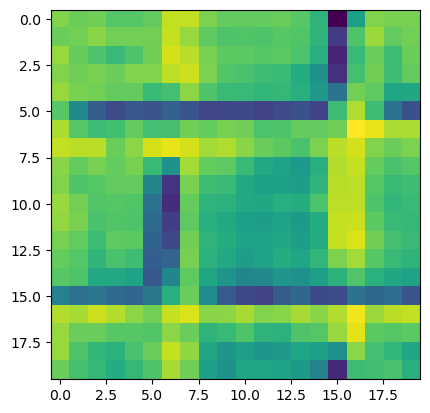

In [64]:

plt.imshow(gray[create_patches(gray)[0][0]:create_patches(gray)[1][0],create_patches(gray)[2][0]:create_patches(gray)[3][0]])

In [12]:
# creating patches
PATCH_SIZE=21
patch_centre=[]

for i in range(1,330):  
    for j in range(1,330):
        patch_centre.append(((PATCH_SIZE//2+1)+(i-1),(PATCH_SIZE//2+1)+(j-1)))              

In [13]:
print(patch_centre[0])
print(patch_centre[-1])

(11, 11)
(339, 339)


In [14]:
print(patch_centre[0])
print(patch_centre[-1])

(11, 11)
(339, 339)


In [15]:
patch_centre

[(11, 11),
 (11, 12),
 (11, 13),
 (11, 14),
 (11, 15),
 (11, 16),
 (11, 17),
 (11, 18),
 (11, 19),
 (11, 20),
 (11, 21),
 (11, 22),
 (11, 23),
 (11, 24),
 (11, 25),
 (11, 26),
 (11, 27),
 (11, 28),
 (11, 29),
 (11, 30),
 (11, 31),
 (11, 32),
 (11, 33),
 (11, 34),
 (11, 35),
 (11, 36),
 (11, 37),
 (11, 38),
 (11, 39),
 (11, 40),
 (11, 41),
 (11, 42),
 (11, 43),
 (11, 44),
 (11, 45),
 (11, 46),
 (11, 47),
 (11, 48),
 (11, 49),
 (11, 50),
 (11, 51),
 (11, 52),
 (11, 53),
 (11, 54),
 (11, 55),
 (11, 56),
 (11, 57),
 (11, 58),
 (11, 59),
 (11, 60),
 (11, 61),
 (11, 62),
 (11, 63),
 (11, 64),
 (11, 65),
 (11, 66),
 (11, 67),
 (11, 68),
 (11, 69),
 (11, 70),
 (11, 71),
 (11, 72),
 (11, 73),
 (11, 74),
 (11, 75),
 (11, 76),
 (11, 77),
 (11, 78),
 (11, 79),
 (11, 80),
 (11, 81),
 (11, 82),
 (11, 83),
 (11, 84),
 (11, 85),
 (11, 86),
 (11, 87),
 (11, 88),
 (11, 89),
 (11, 90),
 (11, 91),
 (11, 92),
 (11, 93),
 (11, 94),
 (11, 95),
 (11, 96),
 (11, 97),
 (11, 98),
 (11, 99),
 (11, 100),
 (11, 101

In [16]:
# # all patches are created using the centre points
# x1=[]
# x2=[]
# y1=[]
# y2=[]
# patches=[]
# for loc in patch_centre:
#     x1.append(loc[0]-(PATCH_SIZE//2))
#     x2.append(loc[0]+(PATCH_SIZE//2))
#     y1.append(loc[1]-(PATCH_SIZE//2))
#     y2.append(loc[1]+(PATCH_SIZE//2))
#     patches.append(image[loc[0]-(PATCH_SIZE//2):loc[0]+(PATCH_SIZE//2),
#                                loc[1]-(PATCH_SIZE//2):loc[1]+(PATCH_SIZE//2)])

In [ ]:
# compute some GLCM properties each patch

diss_sim = []
corr = []
homogen = []
energy = []
contrast = []
uniformity=[]

for patch in patches:
    glcm = graycomatrix(patch, distances=[1,3,5], angles=[0, np.pi/4, np.pi/2], levels=256,
                        symmetric=True, normed=True)
    diss_sim.append(graycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(graycoprops(glcm, 'correlation')[0, 0])
    homogen.append(graycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(graycoprops(glcm, 'energy')[0, 0])
    contrast.append(graycoprops(glcm, 'contrast')[0, 0])
    uniformity.append(graycoprops(glcm,'ASM')[0,0])

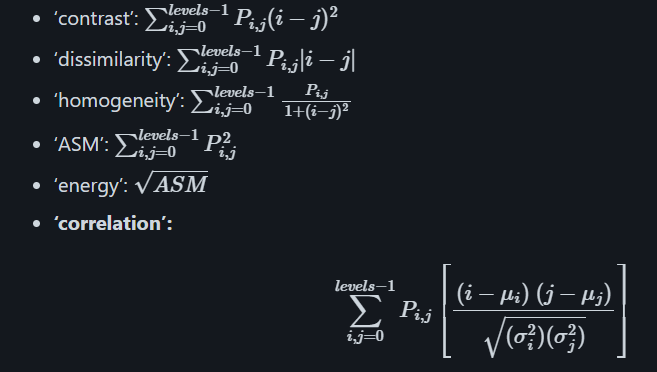

In [466]:
data={'X1':x1,'X2':x2,'Y1':y1,'Y2':y2,'dissimilarity':diss_sim,'correlation':corr,'homogeneity':homogen,'enegy':energy,'contrast':contrast}
raw_patches_df=pd.DataFrame(data)

In [469]:
os.getcwd()

'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Texture Detection\\Brodatz Texture'

In [470]:
os.chdir('../')

In [471]:
raw_patches_df.to_csv('raw_patches.csv')

In [370]:
raw_patches_df.iloc[0]

X1                  1.000000
X2                 21.000000
Y1                  1.000000
Y2                 21.000000
dissimilarity      25.413333
correlation         0.416266
homogeneity         0.059664
enegy               0.042426
contrast         1246.120000
Name: 0, dtype: float64

In [372]:
data1=[]
for i in range(len(raw_patches_df)):
    if raw_patches_df['Y2'][i]<175 and raw_patches_df['X2'][i]<175:
        data1.append(raw_patches_df.iloc[i])

In [378]:
data2=[]
for i in range(len(raw_patches_df)):
    if raw_patches_df['Y2'][i]<350 and raw_patches_df['Y1'][i]>175 and raw_patches_df['X2'][i]<175:
        data2.append(raw_patches_df.iloc[i])
img2_patches=pd.DataFrame(data2)

In [386]:
data3=[]
for i in range(len(raw_patches_df)):
    if raw_patches_df['Y2'][i]<175 and raw_patches_df['X1'][i]>175 and raw_patches_df['X2'][i]<350:
        data3.append(raw_patches_df.iloc[i])
img3_patches=pd.DataFrame(data3)

In [388]:
data4=[]
for i in range(len(raw_patches_df)):
    if raw_patches_df['Y2'][i]<350 and raw_patches_df['Y1'][i]>175 and raw_patches_df['X1'][i]>175 and raw_patches_df['X2'][i]<350:
        data4.append(raw_patches_df.iloc[i])
img4_patches=pd.DataFrame(data4)

In [403]:
print(img1_patches.shape)
print(img2_patches.shape)
print(img3_patches.shape)
print(img4_patches.shape)

(23716, 9)
(23716, 9)
(23716, 9)
(23716, 9)


In [441]:
final_patches= pd.concat([img1_patches,img2_patches,img3_patches,img4_patches], axis=0)

In [442]:
final_patches.isnull().sum()

X1               0
X2               0
Y1               0
Y2               0
dissimilarity    0
correlation      0
homogeneity      0
enegy            0
contrast         0
dtype: int64

In [444]:
final_patches.dropna(inplace=True)
final_patches.reset_index(drop=True,inplace=True)

In [446]:
final_patches.isnull().sum()

X1               0
X2               0
Y1               0
Y2               0
dissimilarity    0
correlation      0
homogeneity      0
enegy            0
contrast         0
dtype: int64

In [447]:
final_patches.shape

(94864, 9)

In [438]:
len(img1_patches)*4

94864

In [448]:
os.getcwd()

'C:\\Users\\LENOVO\\OneDrive\\Desktop\\Texture Detection'

In [449]:
# os.chdir('../')

In [452]:
final_patches.to_csv('patches2.csv')